# Name : Nishant Himanshu

# Task-1: Prediction using Supervised ML

## Predict the percentage of an student based on the no. of study hours.

## Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Reading dataset as a Dataframe

In [2]:
df = pd.read_csv("http://bit.ly/w-data")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Exploratory Data Analysis(EDA)

In [3]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Data Visulization

<AxesSubplot:xlabel='Hours', ylabel='Count'>

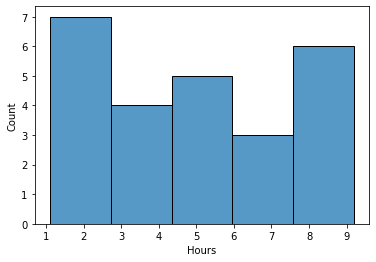

In [5]:
sns.histplot(df["Hours"], bins = 5)

<AxesSubplot:xlabel='Scores', ylabel='Count'>

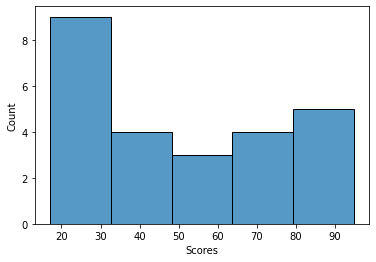

In [6]:
sns.histplot(df["Scores"], bins=5)

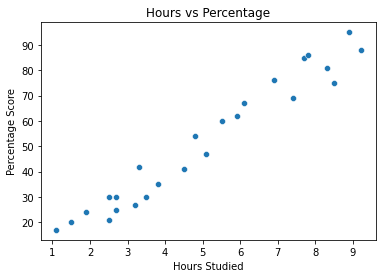

In [22]:
sns.scatterplot(data = df, y= "Scores", x= "Hours")
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

#### From this scatter plot we can clearly see the positive linear correlation between Hours of study and Scores scored

In [8]:
df["Hours"].corr( df["Scores"])

0.9761906560220887

#### We can clearly see that the strength of correlation is very high

### Splitting the Dataset into train and test sets

In [9]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:-1].values, df["Scores"].values, test_size = 0.2, random_state=20)

In [10]:
print(x_train.shape)
print(y_train.shape)

(20, 1)
(20,)


In [11]:
print(x_test.shape)
print(y_test.shape)

(5, 1)
(5,)


## Applying Regression Models

#### Linear Regression

In [13]:
reg = LinearRegression()
reg.fit(x_train, y_train)
pred = reg.predict(x_train)
score = r2_score(pred, y_train)

## Evaluation of the model
print("Training R2 Score",score)
pred = reg.predict(x_test)
score = r2_score(pred, y_test)
print("Test R2 Score",score)

Training R2 Score 0.9579394450683701
Test R2 Score 0.8233661152614393


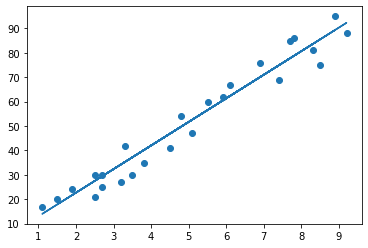

In [14]:
plt.scatter(df["Hours"], df["Scores"])
plt.plot(df["Hours"], reg.coef_*df["Hours"]+ reg.intercept_);
plt.show()

In [24]:
print("Expected Percentage Score",reg.predict([[9.25]])[0])

Expected Percentage Score 92.80108554200021
